# Define figure projection
Here we should the most minimal use of `PolarToolkit`. This example just creates a projection in EPSG:3031, based on a region and figure height (or width). The rest of the example uses standard PyGMT calls.

Import the packages

In [1]:
%%capture
%load_ext autoreload
%autoreload 2


import pygmt

import polartoolkit as ptk

Define a region for the plot

In [ ]:
# Options:

# 1) use the full extent of the grid file
# region = ptk.get_grid_info(bed)[1]

# 2) use a preset region (polartoolkitgions())
# region = ptk.regions.antarctic_peninsula

# 3) define your own region, in meters e, w, n, s in EPSG 3031 (for Antarctica) or
# EPSG 3413 (for the Arctic)
region = (-2700e3, -2000e3, 1000e3, 2000e3)

print(f"region: {region}")

region: (-2700000.0, -2000000.0, 1000000.0, 2000000.0)


Fetch the data to plot

In [4]:
bed = ptk.fetch.bedmap2(layer="bed", region=region)
bed

<xarray.DataArray 'z' (y: 1001, x: 701)> Size: 3MB
array([[-3435., -3435., -3433., ...,   934.,   893.,   873.],
       [-3435., -3432., -3431., ...,   921.,   874.,   848.],
       [-3434., -3431., -3427., ...,   913.,   868.,   835.],
       ...,
       [   nan,    nan,    nan, ..., -4400., -4401., -4402.],
       [   nan,    nan,    nan, ..., -4400., -4401., -4402.],
       [   nan,    nan,    nan, ..., -4401., -4402., -4403.]],
      shape=(1001, 701), dtype=float32)
Coordinates:
  * y        (y) float64 8kB 1e+06 1.001e+06 1.002e+06 ... 1.999e+06 2e+06
  * x        (x) float64 6kB -2.7e+06 -2.699e+06 ... -2.001e+06 -2e+06
Attributes:
    Conventions:   CF-1.7
    title:         Produced by grdcut
    history:       gmt grdcut @GMTAPI@-S-I-G-M-G-N-000000 -G@GMTAPI@-S-O-G-G-...
    description:   
    actual_range:  [-4603.  2040.]
    long_name:     z

Create a projection from the region and a figure height

In [5]:
proj_xy = ptk.set_proj(region, hemisphere="south", fig_height=15)[0]
proj_xy

'x1:6666666.666666667'

Use standard PyGMT commands to plot a figure

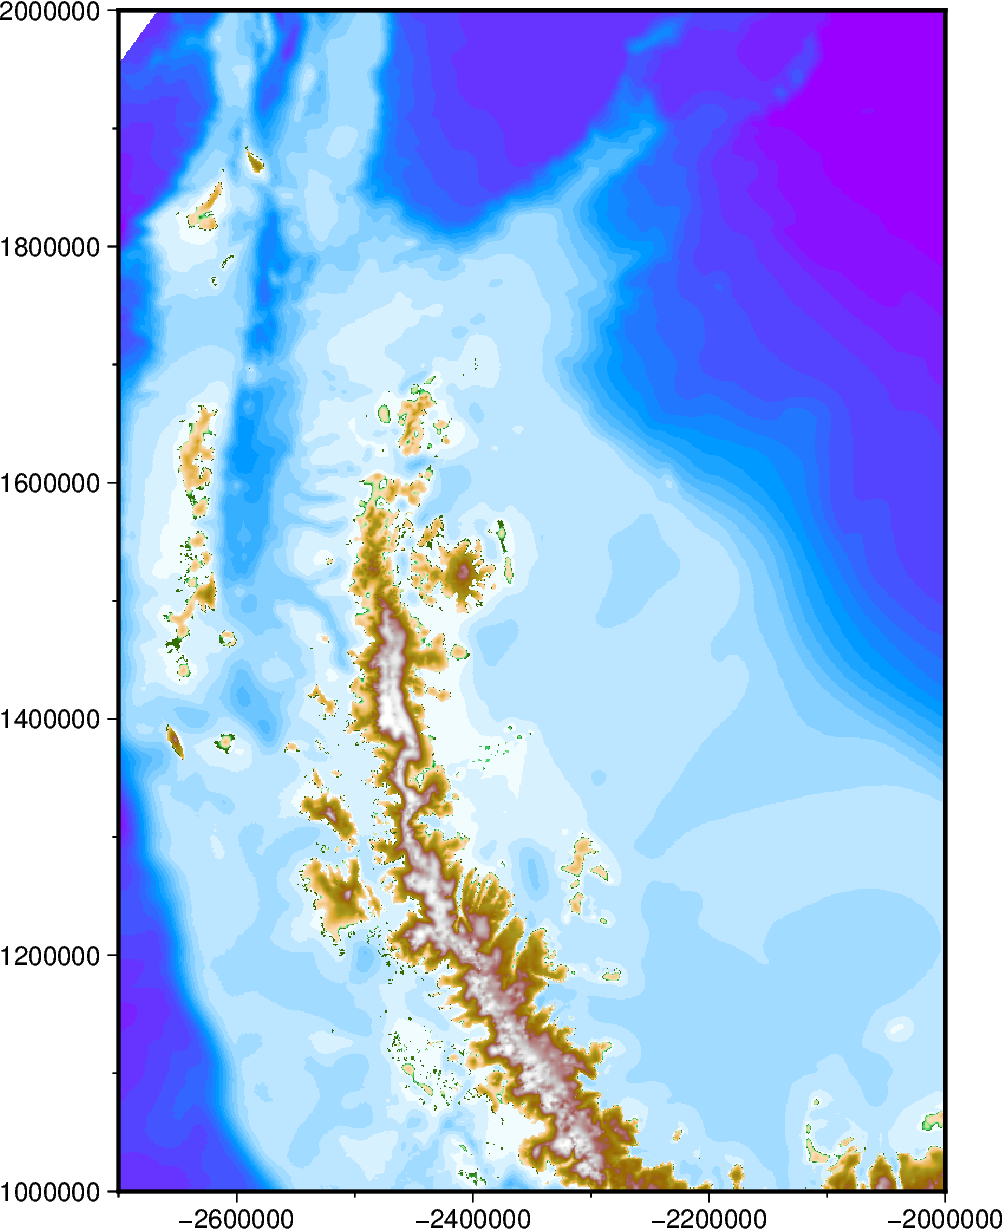

In [6]:
fig = pygmt.Figure()

fig.grdimage(
    grid=bed,
    cmap="globe",
    projection=proj_xy,
    region=region,
    frame=True,
    nan_transparent=True,
)

# display the figure
fig.show(dpi=200)

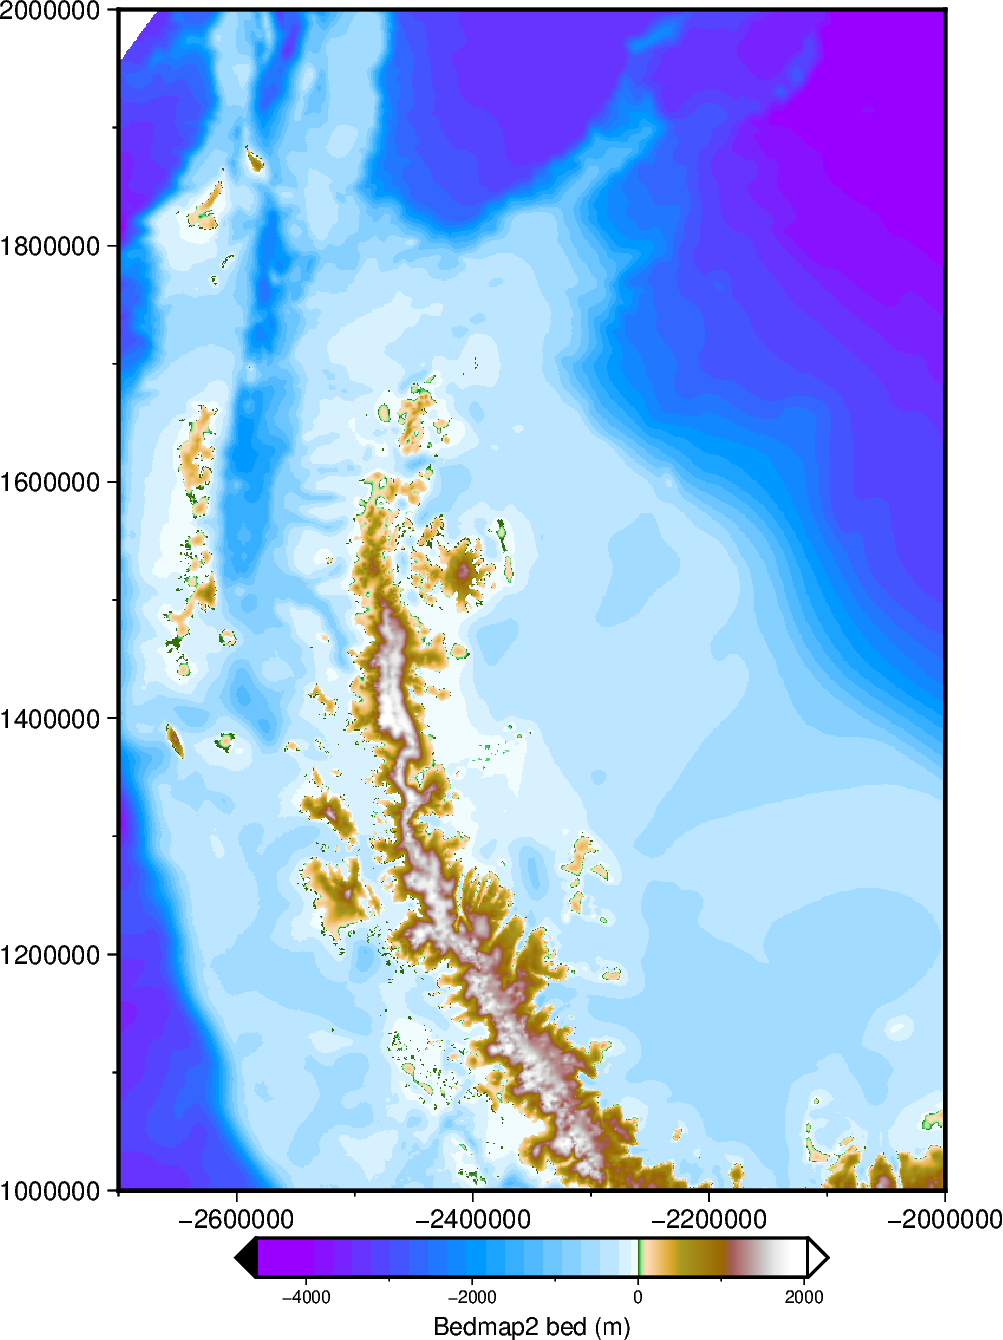

In [7]:
# display colorbar 2/3 as wide as figure
fig.colorbar(
    cmap=True,
    position=f"jBC+w{ptk.get_fig_width() * (2 / 3)}c/.5c+jTC+h+o0c/.6c+e",
    frame="xaf+lBedmap2 bed (m)",
)

fig.show(dpi=200)

You can also create the projection by giving a figure width instead of height

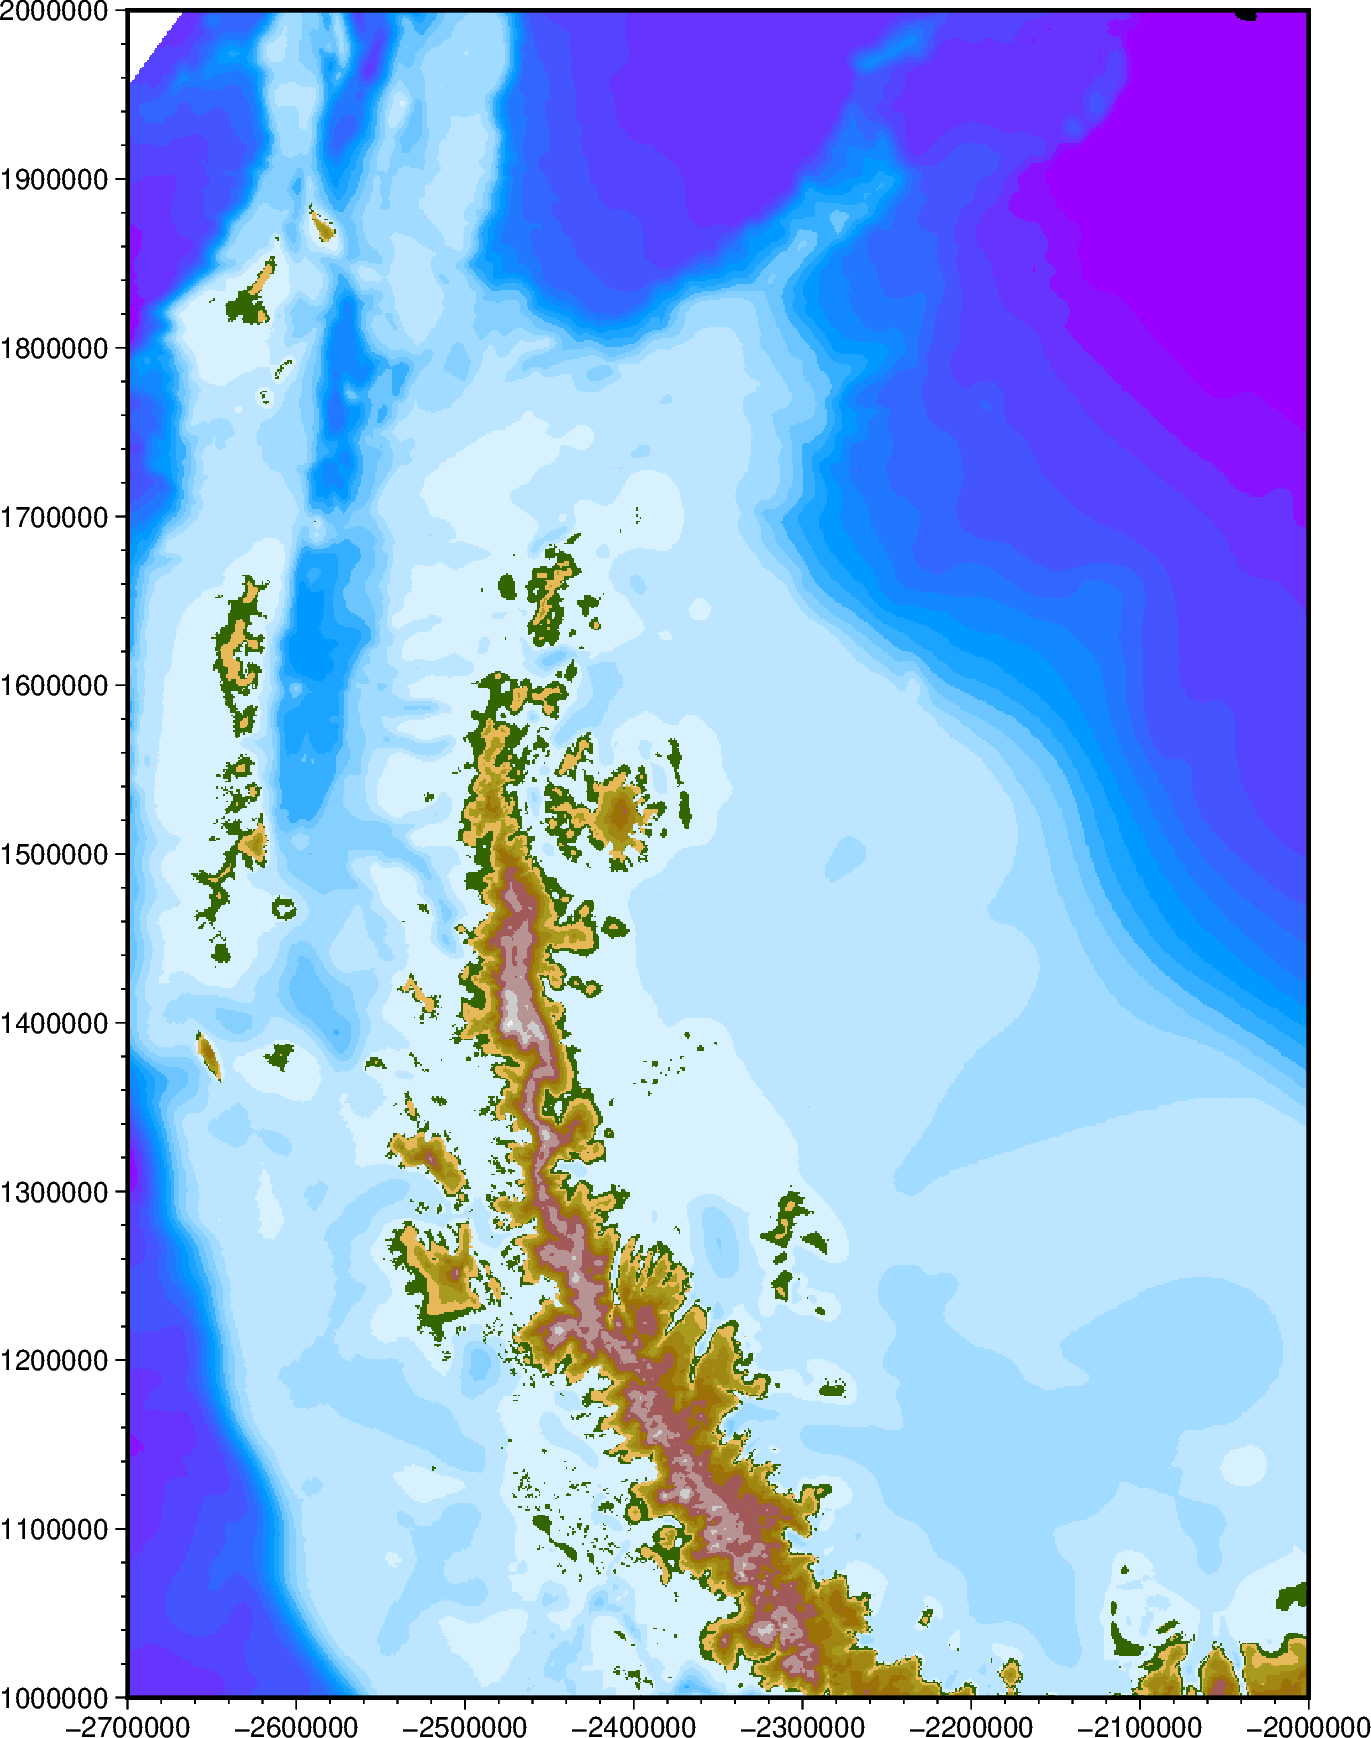

In [8]:
proj_xy = ptk.set_proj(region, hemisphere="south", fig_width=15)[0]

# use standard PyGMT commands to plot figure
fig = pygmt.Figure()

# create a custom colarmap
pygmt.makecpt(
    cmap="globe",
    series="-4500/2500/250",  # 250m increments between -4.5 and +2.5 km.
)

fig.grdimage(
    grid=bed,
    cmap=True,
    projection=proj_xy,
    region=region,
    frame=True,
    nan_transparent=True,
)

# display the figure
fig.show(dpi=200)

You can switch between standard PyGMT commands and PolarToolkit commands. 
Here, on the same figure instance, we'll add:
* a colorbar with a histogram
* an inset location map
* the Antarctic coastline and groundingline

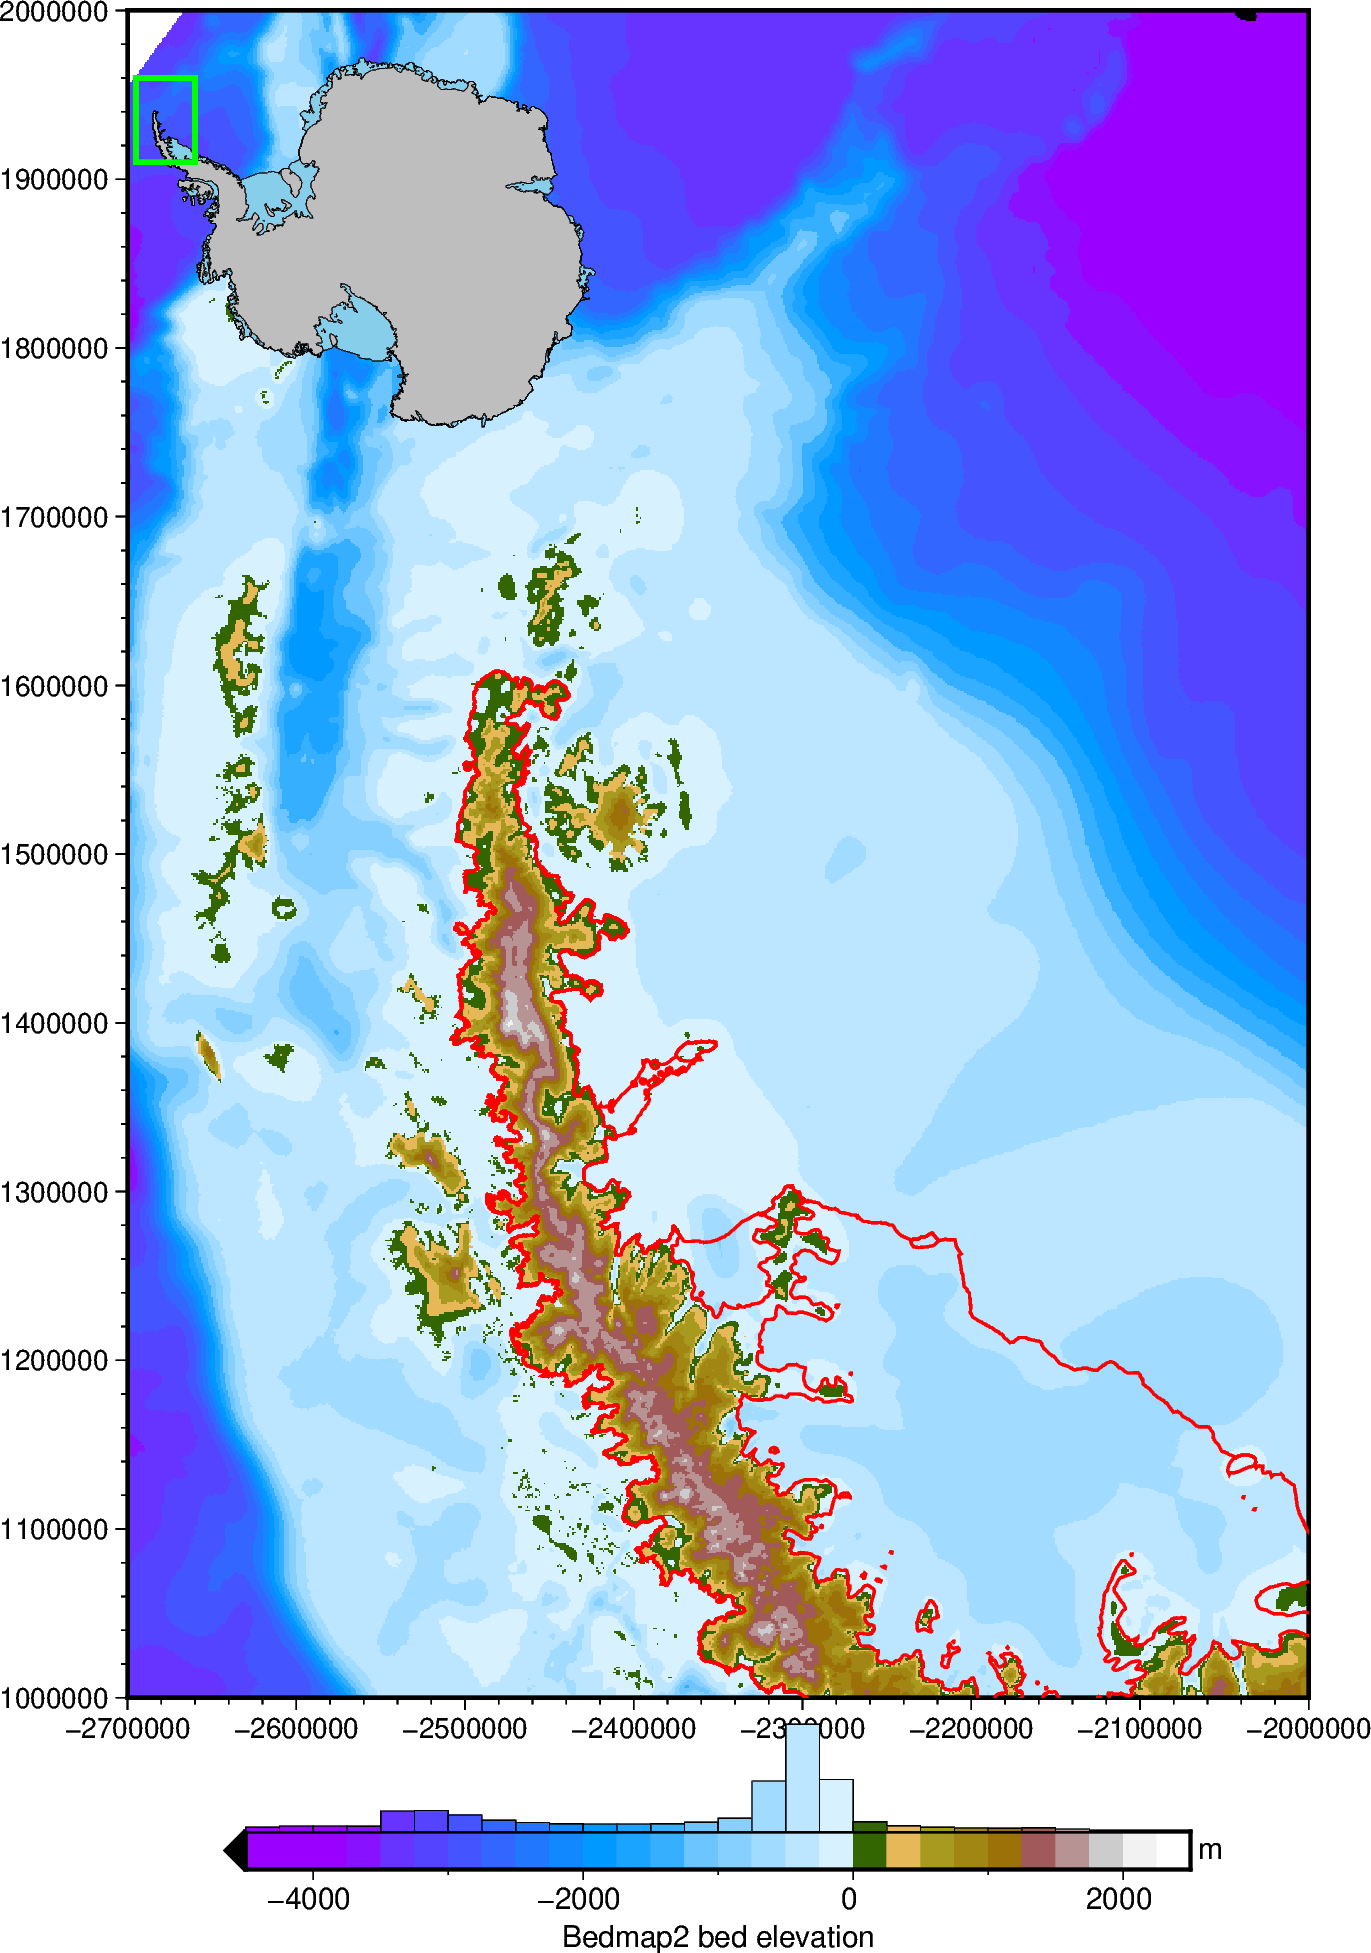

In [9]:
fig = ptk.Figure(
    fig=fig,
    hemisphere="south",
)

fig.add_coast(pen="1p,red")

fig.add_inset(inset_width=0.4, inset_box_pen="2p,green")

fig.add_colorbar(
    cbar_label="Bedmap2 bed elevation",
    cbar_unit="m",
    hist=True,
    cpt_lims=(-4500, 2500),
    grid=bed,
    hist_bin_width=250,  # set this to the cmap interval to match hist bins to cmap bins
    # hist_bin_num=20, # use this instead to set the number of bins
)

fig.show(dpi=200)